In [571]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp


Tabelle: Messung der Schwingungen pro Schwebung

In [572]:
extrema = pd.read_csv('md_extrema.csv')
print(extrema.to_latex(index = False, column_format= 'c c', float_format= '%.2f'))

\begin{tabular}{c c}
\toprule
 C\_k / nF &  Maxima \\
\midrule
     2.19 &       4 \\
     2.86 &       5 \\
     4.74 &       7 \\
     6.86 &       9 \\
     8.18 &      10 \\
     9.99 &      11 \\
    12.00 &      12 \\
\bottomrule
\end{tabular}



Tabelle: Berechnung der Schwingungen pro Schwebung

In [595]:
C_k = extrema.iloc[:,:]
# C_k = extrema.iloc[:,[0]].values.T[0]
# print(C_k)
np.savetxt('C_k.txt', C_k.values, header='C_k', fmt='%.4f')
C_k, n = np.genfromtxt('C_k.txt', unpack=True, skip_header=1)
C_k[0] = 0.997
C_k *= 10**-9
print(C_k)
C_k = unp.uarray(C_k, C_k*0.003)

nu_plus_id = 36.51 *1000
L = 0.023954
C = 0.7932e-9

def nu_minus(l, c, ck):
    return (1/(2*np.pi)) * ( l * ( (1/c) + (2/ck) )**(-1) )**(-1/2)

def nu_schwingung(nu_m, nu_p):
    return 0.5*(nu_m + nu_p)

def nu_schwebung(nu_m, nu_p):
    return nu_m - nu_p

def n_anzahl(nu_schwingung, nu_schwebung):
    return nu_schwingung/nu_schwebung

def relWert(x ,xw):
    return 100*(abs(x-xw))/x

# Berechnung
nu_minus_id = nu_minus(L, C, C_k)
nu_schwingung_id = nu_schwingung(nu_minus_id, nu_plus_id)
nu_schwebung_id = nu_schwebung(nu_minus_id, nu_plus_id)
n_id = unp.nominal_values(n_anzahl(nu_schwingung_id, nu_schwebung_id))
n_rel = relWert(n, unp.nominal_values(n_id))

# Runden der Unsicherheiten (bringt nichts, keine Ahnung)
nu_minus_id_r = nu_minus_id*10**-3
nu_minus_id_r = unp.uarray(np.round(unp.nominal_values(nu_minus_id_r), 2), np.round(unp.std_devs(nu_minus_id_r), 3)) 

nu_schwingung_id_r = nu_schwingung_id*10**-3
nu_schwingung_id_r = unp.uarray(np.round(unp.nominal_values(nu_schwingung_id_r), 2), np.round(unp.std_devs(nu_schwingung_id_r), 3))

nu_schwebung_id_r = nu_schwebung_id*10**-3
nu_schwebung_id_r = unp.uarray(np.round(unp.nominal_values(nu_schwebung_id_r), 2), np.round(unp.std_devs(nu_schwebung_id_r), 3))

#n_id_r = unp.uarray(np.round(unp.nominal_values(n_id), 2), np.round(unp.std_devs(n_id), 3))
n_id_r = np.round(n_id, 2)
n_rel_r = np.round(n_rel, 2)


print(n_rel_r)

d1 = {'C_k/nF': C_k*10**9, 'nu_plus/kHz': nu_plus_id*10**-3, 'nu_minus/kHz': nu_minus_id_r, 'nu_schwingung/kHz': nu_schwingung_id_r,
 'nu_schwebung/kHz': nu_schwebung_id_r, 'n': n_id_r, 'n_rel': n_rel_r} 

df1 = pd.DataFrame(data = d1)
print(df1.to_latex(index = False, column_format= "c c c c c c c"))


[9.97e-10 2.86e-09 4.74e-09 6.86e-09 8.18e-09 9.99e-09 1.20e-08]
[46.5   9.01  0.9   6.85 12.82 23.31 34.14]
\begin{tabular}{c c c c c c c}
\toprule
         C\_k/nF &  nu\_plus/kHz &   nu\_minus/kHz & nu\_schwingung/kHz & nu\_schwebung/kHz &     n &  n\_rel \\
\midrule
0.9970+/-0.0030 &        36.51 &   58.77+/-0.05 &    47.640+/-0.027 &     22.26+/-0.05 &  2.14 &  46.50 \\
  2.860+/-0.009 &        36.51 & 45.530+/-0.024 &    41.020+/-0.012 &    9.020+/-0.024 &  4.55 &   9.01 \\
  4.740+/-0.014 &        36.51 & 42.180+/-0.016 &    39.350+/-0.008 &    5.670+/-0.016 &  6.94 &   0.90 \\
  6.860+/-0.021 &        36.51 & 40.510+/-0.011 &    38.510+/-0.006 &    4.000+/-0.011 &  9.62 &   6.85 \\
  8.180+/-0.025 &        36.51 & 39.900+/-0.010 &    38.200+/-0.005 &    3.390+/-0.010 & 11.28 &  12.82 \\
  9.990+/-0.030 &        36.51 & 39.300+/-0.008 &    37.910+/-0.004 &    2.790+/-0.008 & 13.56 &  23.31 \\
   12.00+/-0.04 &        36.51 & 38.850+/-0.007 &  37.6800+/-0.0030 &    2.340+/-0.007 

Tabelle: Frequenzen der Fundamentalschwingungen

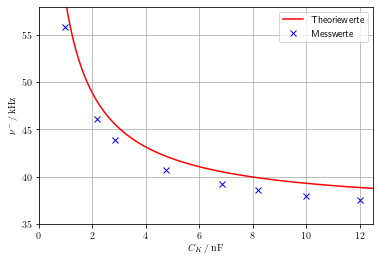

In [594]:
frequenz = pd.read_csv('md_frequenz.csv')
frequenz = frequenz.iloc[:,:]
np.savetxt('frequenz.txt', frequenz.values, header='nu^+ nu^-', fmt='%.3f')
ck, nu_p, n_m = np.genfromtxt('frequenz.txt', unpack=True, skip_header=1)

x = np.linspace(0.997, 13, 120)
y = nu_minus(L, C, x*10**-9)

plt.plot(x, y*10**-3, '-r', label = 'Theoriewerte')
plt.plot(ck, n_m, 'xb', label = 'Messwerte')
plt.xlabel(r'$C_{K} \,/\, \mathrm{nF}$')
plt.ylabel(r'$\nu^- \,/\, \mathrm{kHz}$')
plt.legend(loc="best")
plt.xlim(0, 12.5)
plt.ylim(35, 58)
plt.grid(True)
plt.show()